# NBA Player Shot Charts

In [488]:
import pandas as pd
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.static import players
from nba_api.stats.static import teams
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [495]:
team_colors = {
    "Atlanta Hawks": "#E03A3E",  # Red
    "Boston Celtics": "#007A33",  # Green
    "Brooklyn Nets": "#000000",  # Black
    "Charlotte Hornets": "#1D1160",  # Purple
    "Chicago Bulls": "#CE1141",  # Red
    "Cleveland Cavaliers": "#860038",  # Wine
    "Dallas Mavericks": "#00538C",  # Blue
    "Denver Nuggets": "#0E2240",  # Midnight Blue
    "Detroit Pistons": "#C8102E",  # Red
    "Golden State Warriors": "#1D428A",  # Blue
    "Houston Rockets": "#CE1141",  # Red
    "Indiana Pacers": "#002D62",  # Navy
    "LA Clippers": "#C8102E",  # Red
    "Los Angeles Lakers": "#552583",  # Purple
    "Memphis Grizzlies": "#5D76A9",  # Blue
    "Miami Heat": "#98002E",  # Red
    "Milwaukee Bucks": "#00471B",  # Green
    "Minnesota Timberwolves": "#0C2340",  # Midnight Blue
    "New Orleans Pelicans": "#0C2340",  # Midnight Blue
    "New York Knicks": "#006BB6",  # Blue
    "Oklahoma City Thunder": "#007AC1",  # Blue
    "Orlando Magic": "#0077C0",  # Blue
    "Philadelphia 76ers": "#006BB6",  # Blue
    "Phoenix Suns": "#1D1160",  # Purple
    "Portland Trail Blazers": "#E03A3E",  # Red
    "Sacramento Kings": "#5A2D81",  # Purple
    "San Antonio Spurs": "#C4CED4",  # Silver
    "Toronto Raptors": "#CE1141",  # Red
    "Utah Jazz": "#002B5C",  # Navy
    "Washington Wizards": "#002B5C",  # Navy
}

In [496]:
# Search for the player by name
player_name = "Jalen Brunson"
player_info = players.find_players_by_full_name(player_name)
player_id = player_info[0]['id']

In [498]:
#Get team from player ID
career = playercareerstats.PlayerCareerStats(player_id)
#print(career.get_data_frames()[0])
player_team_id = career.get_data_frames()[0]['TEAM_ID'][len(career.get_data_frames()[0])-1]
#print(career.get_data_frames()[0]['SEASON_ID'][len(career.get_data_frames()[0])-1])

# Fetch the team information using the team ID
team_info = teams.get_teams()
team_name = [team for team in team_info if team['id'] == player_team_id][0]['full_name']
#print(f"{team_name=}")  # Get the full team name
#team_color = team_colors[team_name]

In [429]:
# Fetch shot data for the 2023-24 NBA season
shot_data = shotchartdetail.ShotChartDetail(
    team_id=0,
    player_id=player_id,
    season_nullable='2023-24',
    season_type_all_star='Regular Season',
    context_measure_simple='FGA'
)

# Convert the shot data into a DataFrame
shot_df = shot_data.get_data_frames()[0]
shot_df.head()  # Show the first few rows

print(shot_df.columns)  # Show the data types of each column
shot_df['SHOT_TYPE'].value_counts()  # Count the number of each shot type

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')


SHOT_TYPE
2PT Field Goal    1122
3PT Field Goal     526
Name: count, dtype: int64

In [430]:
# Get relevant totals statistics
total_shots = shot_df.shape[0]
total_makes = shot_df[shot_df['SHOT_MADE_FLAG'] == 1].shape[0]
total_make_percentage = total_makes / total_shots

In [431]:
# Get statistics for 3-point shots
three_point_shots = shot_df[shot_df['SHOT_TYPE'] == '3PT Field Goal']
three_point_makes = three_point_shots[three_point_shots['SHOT_MADE_FLAG'] == 1]
# print(three_point_makes.shape[0], three_point_shots.shape[0])
three_point_percentage = three_point_makes.shape[0] / three_point_shots.shape[0]
threes_percent = str(round(three_point_percentage * 100, 1)) + '%'

# Get statistics for 2-point shots
two_point_shots = shot_df[shot_df['SHOT_TYPE'] == '2PT Field Goal']
two_point_makes = two_point_shots[two_point_shots['SHOT_MADE_FLAG'] == 1]
# print(two_point_makes.shape[0], two_point_shots.shape[0])
two_point_percentage = two_point_makes.shape[0] / two_point_shots.shape[0]
twos_percent = str(round(two_point_percentage * 100, 1)) + '%'

In [432]:
# Get the average shot distance
point_average_distance = shot_df['SHOT_DISTANCE'].mean()
point_average_distance = round(point_average_distance, 1)
#print(f"average shot distance: {point_average_distance}")

In [500]:
# Define styles for the plot
background_color = "#0C0D0E"
team_color = team_colors[team_name]

# TODO: change font
import matplotlib.font_manager as font_manager
font_path = 'assets/Arvo-Regular.ttf'
font_props = font_manager.FontProperties(fname=font_path)

font_path_bold = 'assets/Arvo-Bold.ttf'
font_props_bold = font_manager.FontProperties(fname=font_path_bold)

In [434]:
def draw_colored_court(ax=None, lw=2):
    """
    Draw a half-court basketball court with improved visuals and colors.
    """
    if ax is None:
        ax = plt.gca()

    # Court elements colors
    court_color = "#4d4d4d"  # Dark gray for court lines
    hoop_color = "#d62728"  # Red for hoop
    paint_color = "#1f77b4"  # Blue for the paint (key area)
    
    # Hoop
    hoop = plt.Circle((0, 0), radius=7.5, linewidth=lw, color=court_color, fill=False)

    # Backboard
    backboard = plt.Rectangle((-30, -7.5), 60, 1, linewidth=lw, color=court_color)

    # Paint area (key)
    paint = plt.Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=court_color, fill=False)

    # Free-throw circle
    free_throw_top = plt.Circle((0, 142.5), radius=60, linewidth=lw, color=court_color, fill=False)
    free_throw_bottom = plt.Circle((0, 142.5), radius=60, linewidth=lw, color=court_color, fill=False, linestyle='dashed')

    # Restricted area arc
    restricted_area = plt.Circle((0, 0), radius=40, linewidth=lw, color=court_color, fill=False)

    # Three-point line (arc and straight lines)
    three_point_arc = patches.Arc((0, 0), 475, 475, theta1=22, theta2=157, linewidth=lw, color=court_color)  # Arc
    three_point_side1 = plt.Line2D([-220, -220], [-47.5, 92.5], linewidth=lw, color=court_color)  # Left corner
    three_point_side2 = plt.Line2D([220, 220], [-47.5, 92.5], linewidth=lw, color=court_color)  # Right corner

    # Adding the elements to the axes
    ax.add_patch(hoop)
    ax.add_patch(backboard)
    ax.add_patch(paint)
    ax.add_patch(free_throw_top)
    ax.add_patch(free_throw_bottom)
    ax.add_patch(restricted_area)
    ax.add_patch(three_point_arc)
    ax.add_line(three_point_side1)
    ax.add_line(three_point_side2)

    # Set court boundaries and remove axes
    ax.set_xlim(-250, 250)
    ax.set_ylim(-47.5, 422.5)
    ax.set_aspect(1)
    ax.axis('off')

    return ax



/var/folders/w6/f0qyl4rd7v789m3kymvy95vc0000gn/T/ipykernel_57125/3734181384.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'], c='#d62728', marker='x', s=100, edgecolors='black', label='Missed Shots', zorder=2)


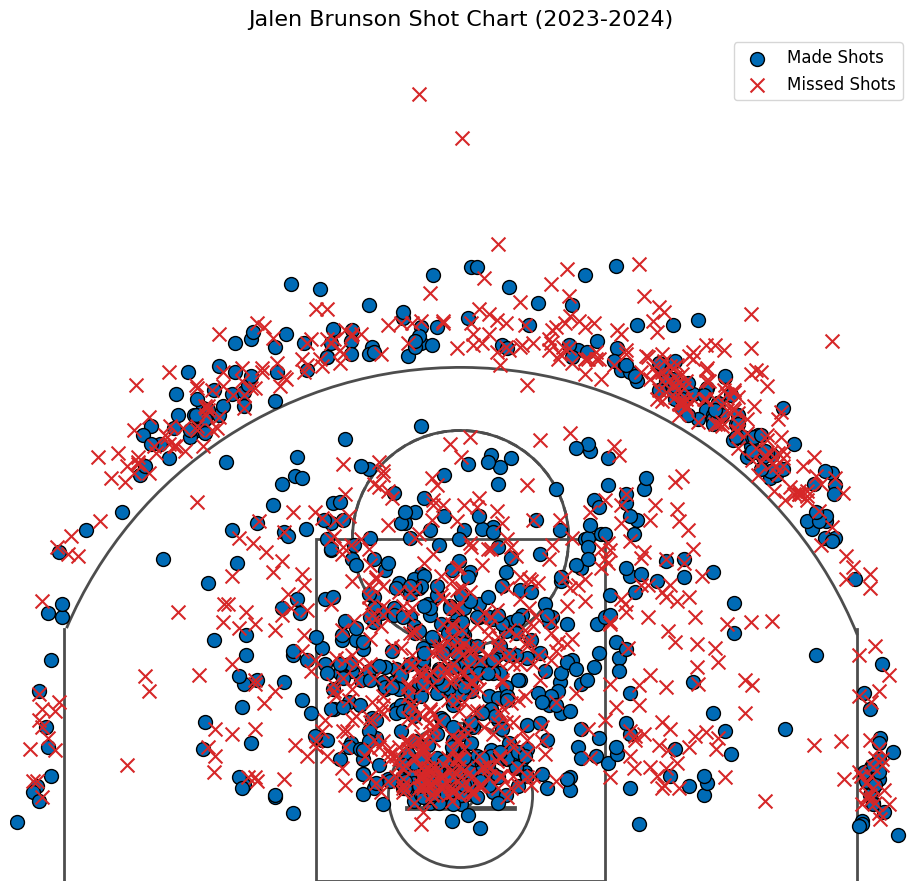

In [501]:
# Filter for made shots (SHOT_MADE_FLAG == 1)
made_shots = shot_df[shot_df['SHOT_MADE_FLAG'] == 1]

# Filter for missed shots (SHOT_ATTEMPTED_FLAG == 1 but SHOT_MADE_FLAG is missing or not 1)
missed_shots = shot_df[(shot_df['SHOT_ATTEMPTED_FLAG'] == 1) & (~shot_df['SHOT_MADE_FLAG'].astype(bool))]

# Plot the made and missed shots
fig, ax = plt.subplots(figsize=(12, 11))

# Draw the basketball court
draw_colored_court(ax)

# Plot made shots (green circles)
ax.scatter(made_shots['LOC_X'], made_shots['LOC_Y'], c=team_color, marker='o', s=100, edgecolors='black', label='Made Shots', zorder=2)

# Plot missed shots (red crosses)
ax.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'], c='#d62728', marker='x', s=100, edgecolors='black', label='Missed Shots', zorder=2)

# Add title and legend
ax.set_title(f"{player_name} Shot Chart (2023-2024)", fontsize=16)
ax.legend(loc='upper right', fontsize=12)

# Show the plot
plt.show()


In [436]:
def draw_court(ax=None, color='white', lw=2):
    if ax is None:
        ax = plt.gca()
    
    # Basketball hoop
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)
    
    # Backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)
    
    # The paint
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)
    
    # Free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
    
    # Free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, linestyle='dashed')
    
    # Restricted area
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)
    
    # Three point line
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)
    
    # Center court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0, linewidth=lw, color=color)
    
    # List of the court elements to be plotted
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]
    
    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
    
    return ax

/var/folders/w6/f0qyl4rd7v789m3kymvy95vc0000gn/T/ipykernel_57125/3014372894.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


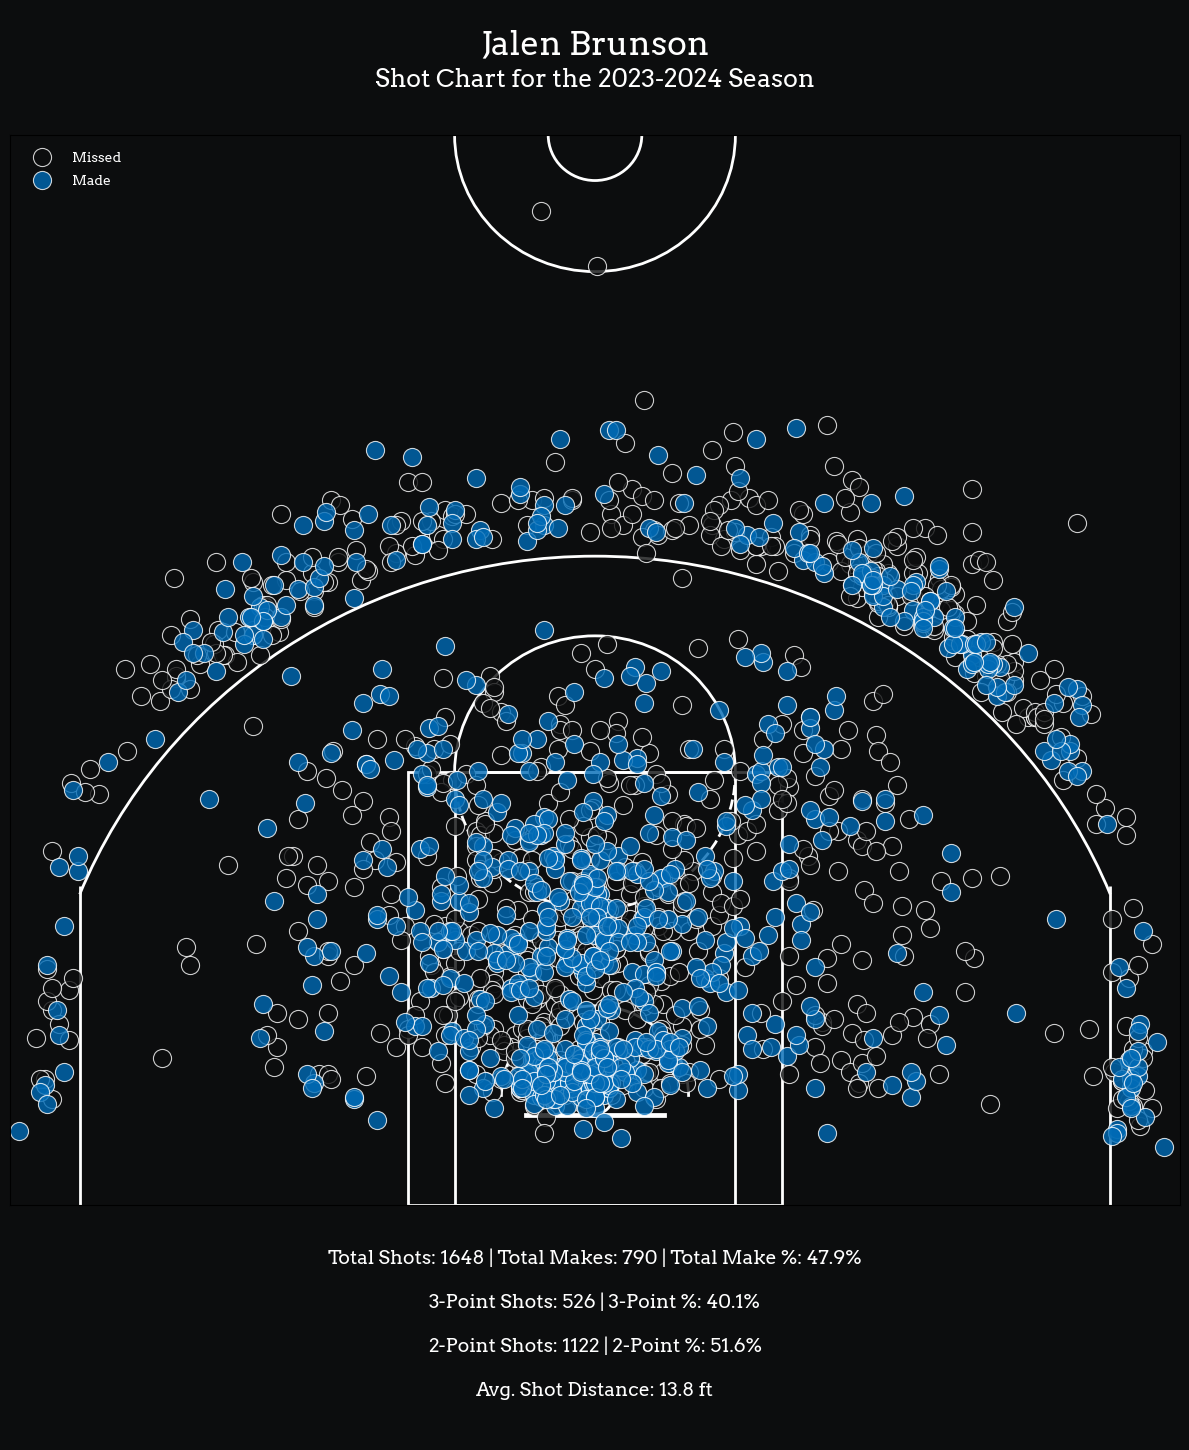

In [502]:
import matplotlib.pyplot as plt

# Create the figure and main axis for the shot chart
fig = plt.figure(figsize=(12, 11), facecolor=background_color)
ax = fig.add_subplot(111)

# Draw the court (assuming draw_court is a predefined function)
draw_court(ax, color=court_color)

# Plot the shots
made_shots = shot_df[shot_df['SHOT_MADE_FLAG'] == 1]
missed_shots = shot_df[shot_df['SHOT_MADE_FLAG'] == 0]

ax.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'], c=background_color, s=170, alpha=0.8, linewidths=0.8, edgecolors='white', zorder=2, label='Missed')
ax.scatter(made_shots['LOC_X'], made_shots['LOC_Y'], c=team_color, s=170, alpha=0.8, linewidths=0.8, edgecolors='white', zorder=2, label='Made')

# Customize the shot chart axis
ax.set_facecolor(background_color)
ax.set_xlim(-250, 250)
ax.set_ylim(-47.5, 422.5)
ax.set_xticks([])
ax.set_yticks([])

# Add legend
legend = ax.legend(loc='upper left', fontsize=12, frameon=False)
for text in legend.get_texts():
    text.set_color('white')
    text.set_fontproperties(font_props)

# Create a separate axis for the title (just above the shot chart)
ax_title = fig.add_axes([0.1, 1.0, 0.8, 0.1])  # (left, bottom, width, height)
ax_title.set_axis_off()  # Hide the axis box

# Add title and subtitle
ax_title.text(0.5, 0.6, f"{player_name}", fontproperties=font_props, fontsize=24, ha='center', color='white', fontweight='bold')
ax_title.text(0.5, 0.3, "Shot Chart for the 2023-2024 Season", fontproperties=font_props, fontsize=18, ha='center', color='white')

# Create a separate axis for statistics (just below the shot chart)
ax_stats = fig.add_axes([0.1, -0.2, 0.8, 0.2])  # (left, bottom, width, height)
ax_stats.set_axis_off()  # Hide the axis box

# Add statistics
ax_stats.text(0.5, 0.8, f"Total Shots: {total_shots} | Total Makes: {total_makes} | Total Make %: {total_make_percentage:.1%}",
              fontproperties=font_props, fontsize=14, ha='center', color='white')
ax_stats.text(0.5, 0.6, f"3-Point Shots: {three_point_shots.shape[0]} | 3-Point %: {threes_percent}",
              fontproperties=font_props, fontsize=14, ha='center', color='white')
ax_stats.text(0.5, 0.4, f"2-Point Shots: {two_point_shots.shape[0]} | 2-Point %: {twos_percent}",
              fontproperties=font_props, fontsize=14, ha='center', color='white')
ax_stats.text(0.5, 0.2, f"Avg. Shot Distance: {point_average_distance} ft",
              fontproperties=font_props, fontsize=14, ha='center', color='white')

plt.tight_layout()
plt.show()
